In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

In [3]:
# ==========================
# 1. Cargar dataset
# ==========================
# Cargar datos
data = pd.read_csv(r"C:\week3.csv", comment="#", header=None)
print("File 'week3.csv' loaded successfully into a DataFrame!")
print(data.head())  

# Leer la primera línea ('#')
with open(r"C:\week3.csv", "r") as f:
    first_line = f.readline().strip()
    print("Primera línea del dataset:", first_line)

# Separar features y target
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

File 'week3.csv' loaded successfully into a DataFrame!
      0     1         2
0  0.13  0.51  0.290096
1 -0.12  0.32  0.276145
2  0.75  0.44 -0.105805
3 -0.93  0.79 -0.211477
4  0.08 -0.84 -0.816137
Primera línea del dataset: # id:6--6-6


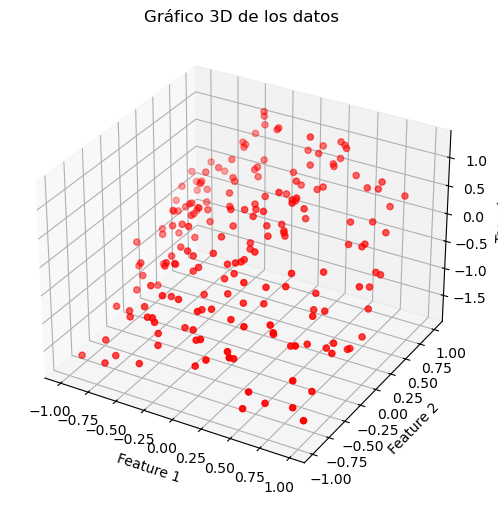

In [4]:
# ==========================
# 2. Gráfica de dispersión 3D
# ==========================
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title("Gráfico 3D de los datos")
plt.show()

In [5]:
# ==========================
# 3. Características polinomiales
# ==========================
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(["x1", "x2"])

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [6]:
# ==========================
# 4. Entrenamiento Lasso para distintos C
# ==========================
C_values = [0.1, 1, 10, 100, 1000]
models_lasso = {}


for C in C_values:
    alpha = 1 / (2 * C)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_poly_scaled, y)
    models_lasso[C] = lasso
    
    print(f"\n=== Lasso con C={C} (alpha={alpha:.5f}) ===")
    for fname, coef in zip(feature_names, lasso.coef_):
        print(f"{fname}: {coef:.4f}")


=== Lasso con C=0.1 (alpha=5.00000) ===
x1: -0.0000
x2: 0.0000
x1^2: -0.0000
x1 x2: 0.0000
x2^2: 0.0000
x1^3: -0.0000
x1^2 x2: 0.0000
x1 x2^2: -0.0000
x2^3: 0.0000
x1^4: -0.0000
x1^3 x2: 0.0000
x1^2 x2^2: -0.0000
x1 x2^3: -0.0000
x2^4: 0.0000
x1^5: -0.0000
x1^4 x2: 0.0000
x1^3 x2^2: -0.0000
x1^2 x2^3: 0.0000
x1 x2^4: -0.0000
x2^5: 0.0000

=== Lasso con C=1 (alpha=0.50000) ===
x1: -0.0000
x2: 0.0582
x1^2: -0.0000
x1 x2: 0.0000
x2^2: 0.0000
x1^3: -0.0000
x1^2 x2: 0.0000
x1 x2^2: -0.0000
x2^3: 0.0000
x1^4: -0.0000
x1^3 x2: 0.0000
x1^2 x2^2: -0.0000
x1 x2^3: 0.0000
x2^4: 0.0000
x1^5: -0.0000
x1^4 x2: 0.0000
x1^3 x2^2: -0.0000
x1^2 x2^3: 0.0000
x1 x2^4: -0.0000
x2^5: 0.0000

=== Lasso con C=10 (alpha=0.05000) ===
x1: -0.0000
x2: 0.4724
x1^2: -0.2478
x1 x2: 0.0000
x2^2: 0.0000
x1^3: -0.0000
x1^2 x2: 0.0000
x1 x2^2: 0.0000
x2^3: 0.0542
x1^4: -0.0000
x1^3 x2: 0.0000
x1^2 x2^2: -0.0000
x1 x2^3: 0.0000
x2^4: 0.0000
x1^5: -0.0000
x1^4 x2: 0.0000
x1^3 x2^2: 0.0000
x1^2 x2^3: 0.0000
x1 x2^4: 0.000

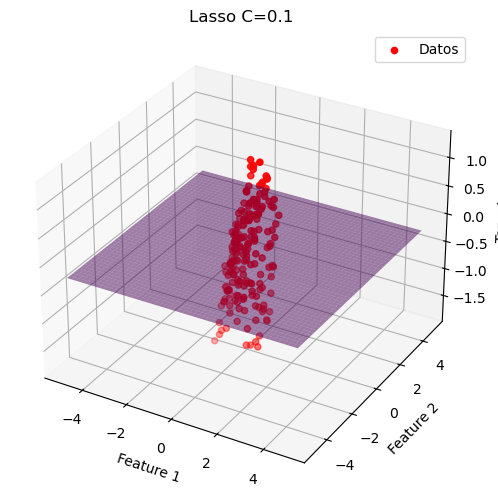

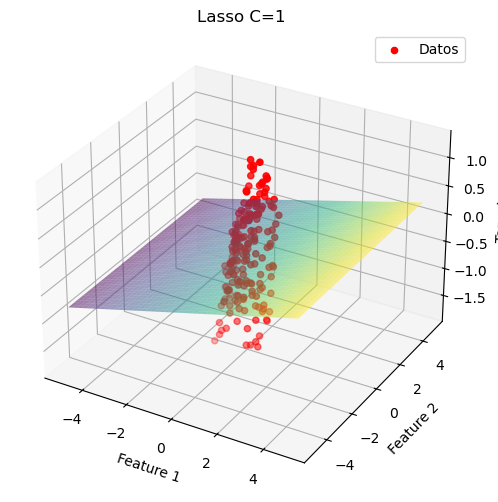

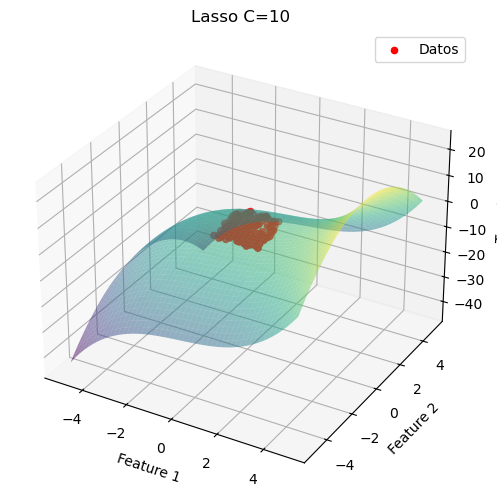

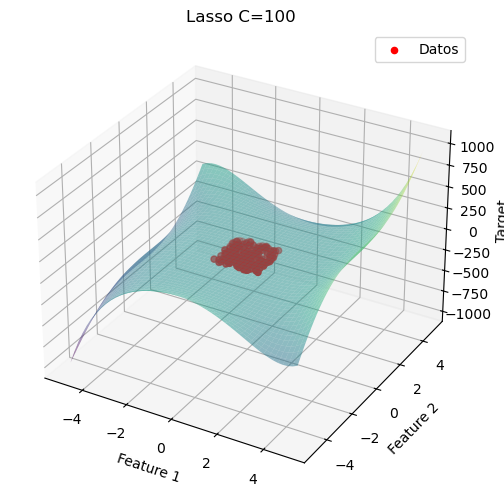

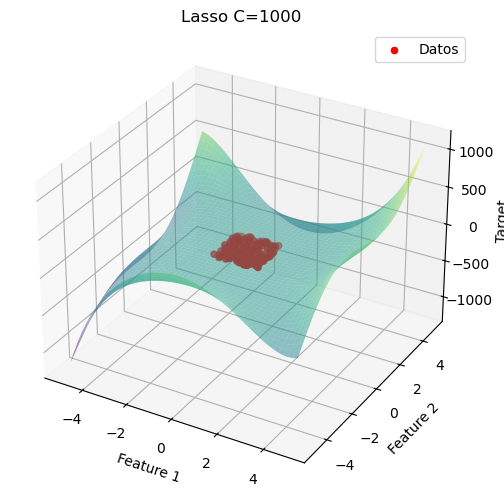

In [7]:
# ==========================
# 5.1. Visualización de superficies de predicción
# ==========================
grid = np.linspace(-5, 5, 50)
Xtest = np.array([[i, j] for i in grid for j in grid])
Xtest_poly = poly.transform(Xtest)
Xtest_poly_scaled = scaler.transform(Xtest_poly)

xx, yy = np.meshgrid(grid, grid)

for C, model in models_lasso.items():
    preds = model.predict(Xtest_poly_scaled)
    zz = preds.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Datos')
    ax.set_title(f"Lasso C={C}")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Target')
    plt.legend()
    plt.show()

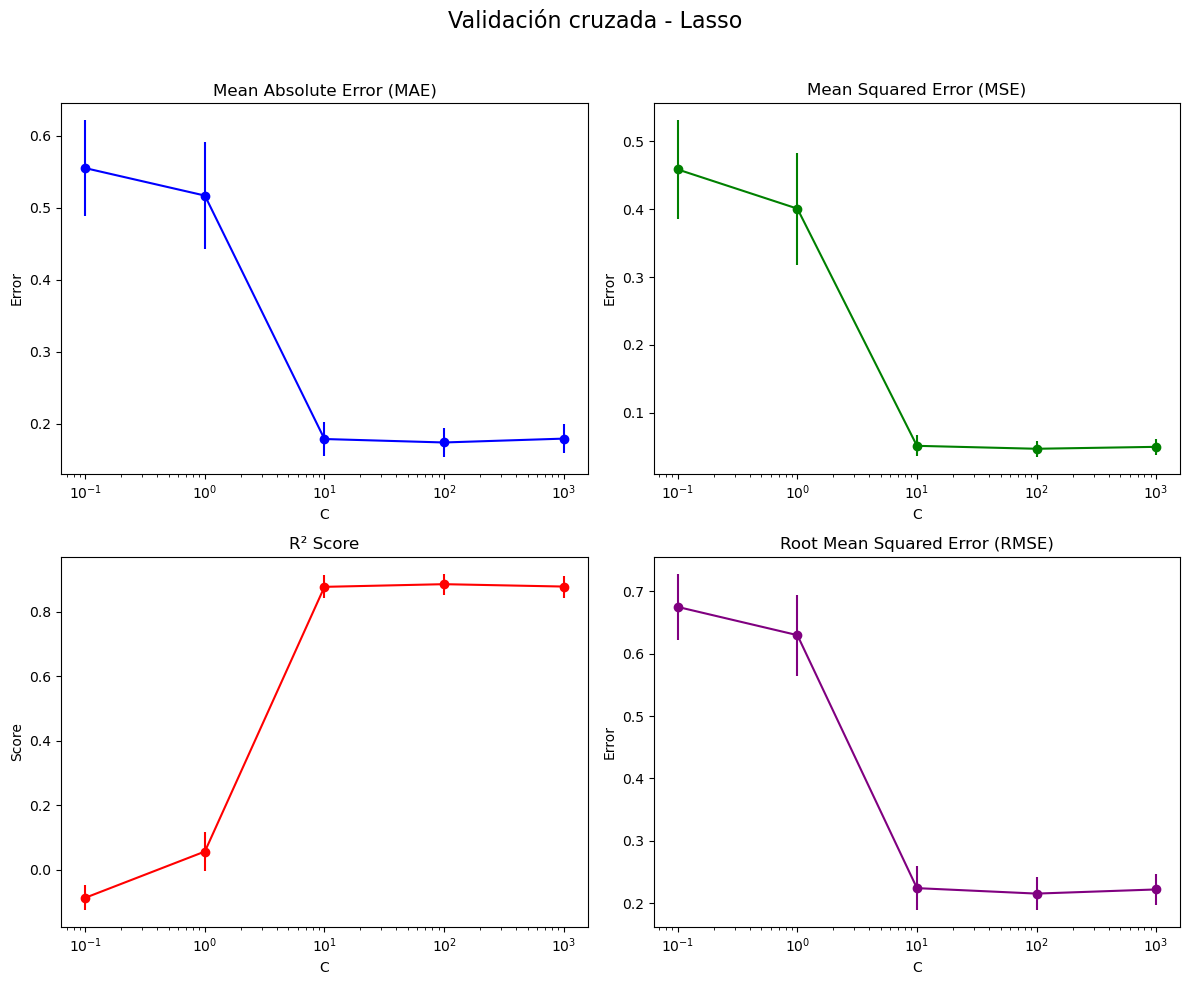

In [15]:
# ==========================
# 5.1 Validación cruzada (Lasso)
# ==========================
mean_scores_mae, std_scores_mae = [], []
mean_scores_mse, std_scores_mse = [], []
mean_scores_r2, std_scores_r2 = [], []
mean_scores_rmse, std_scores_rmse = [], []

for C in C_values:
    alpha = 1 / (2 * C)
    lasso = Lasso(alpha=alpha, max_iter=10000)

    # MAE
    scores = cross_val_score(lasso, X_poly_scaled, y, cv=5,
                             scoring=make_scorer(mean_absolute_error, greater_is_better=False))
    mean_scores_mae.append(-scores.mean())
    std_scores_mae.append(scores.std())

    # MSE
    scores = cross_val_score(lasso, X_poly_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_scores_mse.append(-scores.mean())
    std_scores_mse.append(scores.std())

    # R²
    scores = cross_val_score(lasso, X_poly_scaled, y, cv=5, scoring='r2')
    mean_scores_r2.append(scores.mean())
    std_scores_r2.append(scores.std())

    # RMSE (a partir del MSE)
    scores = cross_val_score(lasso, X_poly_scaled, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_scores_rmse.append(rmse_scores.mean())
    std_scores_rmse.append(rmse_scores.std())


# ---- GRAFICAR ---- #
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# MAE
axs[0,0].errorbar(C_values, mean_scores_mae, yerr=std_scores_mae, fmt='-o', color="blue")
axs[0,0].set_xscale("log")
axs[0,0].set_title("Mean Absolute Error (MAE)")
axs[0,0].set_xlabel("C")
axs[0,0].set_ylabel("Error")

# MSE
axs[0,1].errorbar(C_values, mean_scores_mse, yerr=std_scores_mse, fmt='-o', color="green")
axs[0,1].set_xscale("log")
axs[0,1].set_title("Mean Squared Error (MSE)")
axs[0,1].set_xlabel("C")
axs[0,1].set_ylabel("Error")

# R²
axs[1,0].errorbar(C_values, mean_scores_r2, yerr=std_scores_r2, fmt='-o', color="red")
axs[1,0].set_xscale("log")
axs[1,0].set_title("R² Score")
axs[1,0].set_xlabel("C")
axs[1,0].set_ylabel("Score")

# RMSE
axs[1,1].errorbar(C_values, mean_scores_rmse, yerr=std_scores_rmse, fmt='-o', color="purple")
axs[1,1].set_xscale("log")
axs[1,1].set_title("Root Mean Squared Error (RMSE)")
axs[1,1].set_xlabel("C")
axs[1,1].set_ylabel("Error")

plt.suptitle("Validación cruzada - Lasso", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
# ==========================
# 5.2. Entrenamiento con Ridge
# ==========================
alphas = [1/0.1, 1/1, 1/10, 1/100, 1/1000]  # porque alpha = 1/C
Cs = [0.1, 1, 10, 100, 1000]

models_ridge = {}

for C, alpha in zip(Cs, alphas):
    model = Ridge(alpha=alpha)
    model.fit(X_poly_scaled, y)
    models_ridge[C] = model
    print(f"=== Ridge con C={C} (alpha={alpha:.5f}) ===")
    for name, coef in zip(poly.get_feature_names_out(['x1','x2']), model.coef_):
        print(f"{name}: {coef:.4f}")
    print()

=== Ridge con C=0.1 (alpha=10.00000) ===
x1: -0.0090
x2: 0.3995
x1^2: -0.2166
x1 x2: 0.0307
x2^2: 0.0025
x1^3: -0.0093
x1^2 x2: 0.0597
x1 x2^2: 0.0073
x2^3: 0.1368
x1^4: -0.0778
x1^3 x2: 0.0112
x1^2 x2^2: 0.0134
x1 x2^3: -0.0323
x2^4: -0.0168
x1^5: -0.0303
x1^4 x2: -0.0059
x1^3 x2^2: 0.0422
x1^2 x2^3: -0.0496
x1 x2^4: -0.0021
x2^5: 0.0324

=== Ridge con C=1 (alpha=1.00000) ===
x1: -0.0315
x2: 0.5143
x1^2: -0.2947
x1 x2: 0.0487
x2^2: -0.0038
x1^3: 0.0424
x1^2 x2: 0.0007
x1 x2^2: 0.0080
x2^3: 0.0560
x1^4: -0.0160
x1^3 x2: 0.0103
x1^2 x2^2: 0.0304
x1 x2^3: -0.0479
x2^4: -0.0185
x1^5: -0.0699
x1^4 x2: 0.0090
x1^3 x2^2: 0.0587
x1^2 x2^3: -0.0273
x1 x2^4: -0.0125
x2^5: 0.0295

=== Ridge con C=10 (alpha=0.10000) ===
x1: -0.0614
x2: 0.5704
x1^2: -0.3096
x1 x2: 0.0521
x2^2: -0.0040
x1^3: 0.1111
x1^2 x2: -0.0347
x1 x2^2: 0.0169
x2^3: -0.0397
x1^4: -0.0032
x1^3 x2: 0.0092
x1^2 x2^2: 0.0333
x1 x2^3: -0.0511
x2^4: -0.0196
x1^5: -0.1130
x1^4 x2: 0.0192
x1^3 x2^2: 0.0529
x1^2 x2^3: -0.0070
x1 x2^4: -

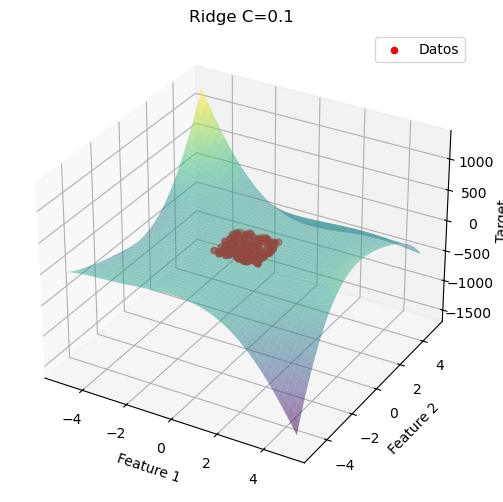

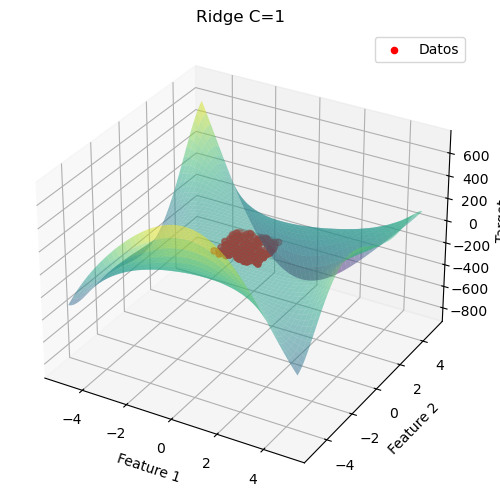

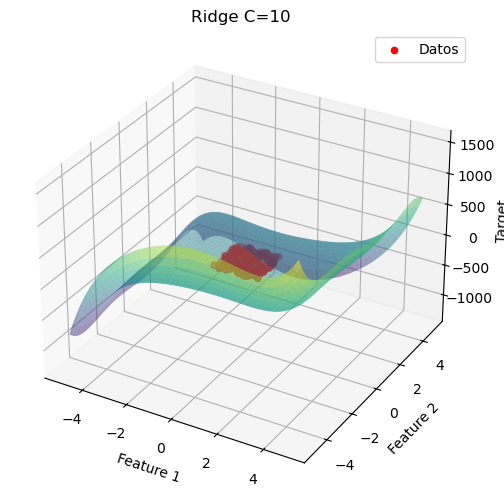

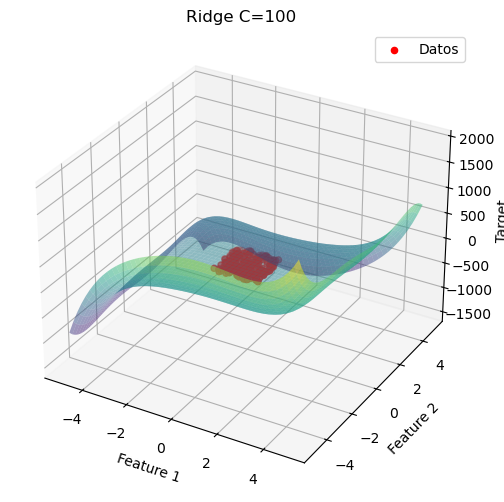

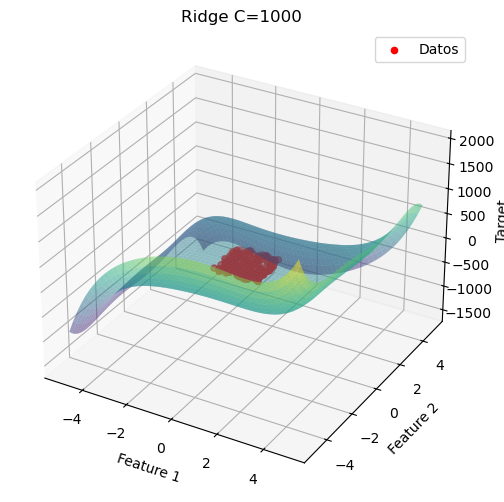

In [10]:
# ==========================
# 5.2 Visualización de superficies de predicción (Ridge)
# ==========================

grid = np.linspace(-5, 5, 50)
Xtest = np.array([[i, j] for i in grid for j in grid])
Xtest_poly = poly.transform(Xtest)
Xtest_poly_scaled = scaler.transform(Xtest_poly)

xx, yy = np.meshgrid(grid, grid)

for C, model in models_ridge.items():
    preds = model.predict(Xtest_poly_scaled)
    zz = preds.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Datos')
    ax.set_title(f"Ridge C={C}")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Target')
    plt.legend()
    plt.show()

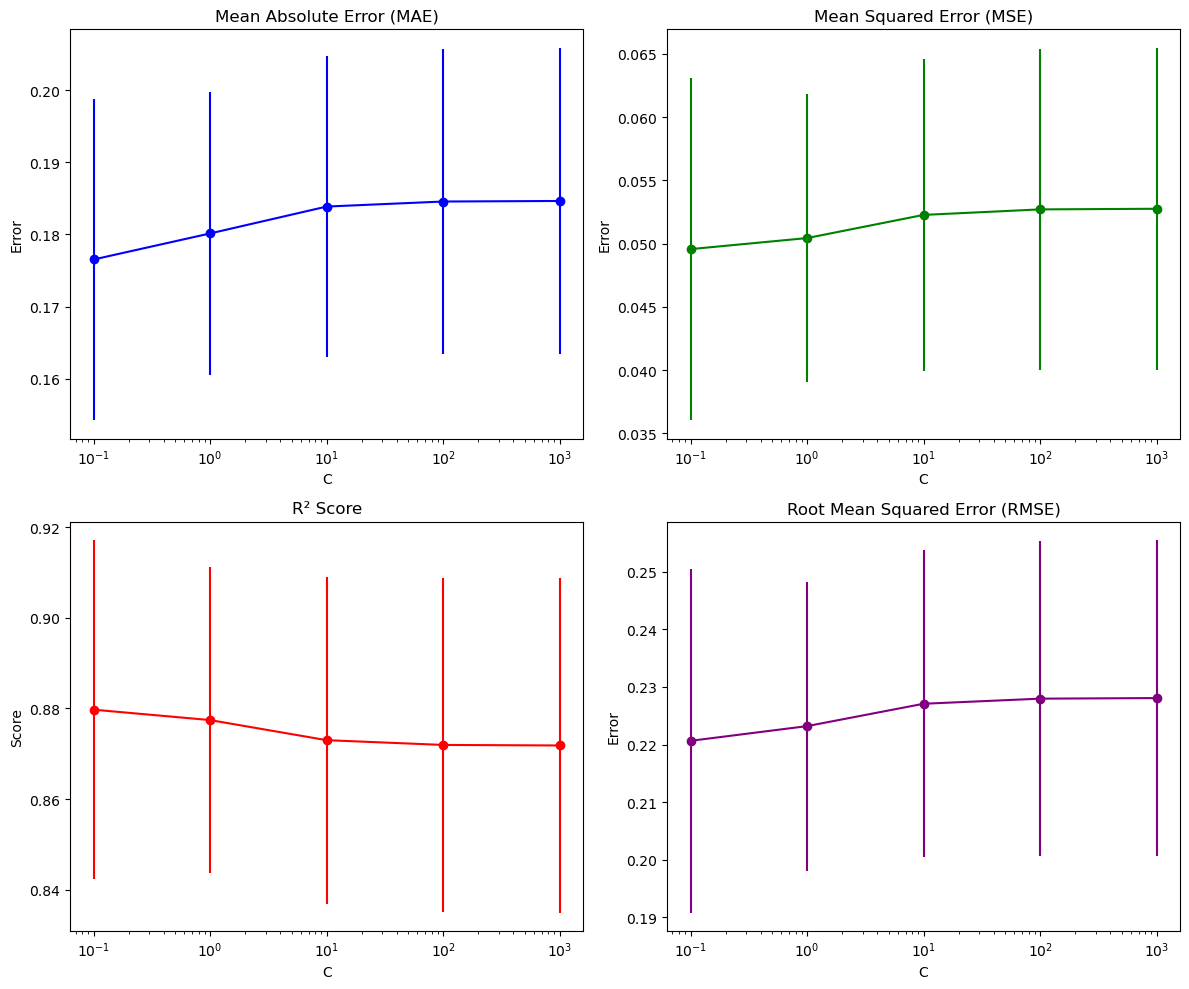

In [14]:
# ==========================
# 5.1 Validación cruzada (Ridge)
# ==========================

mean_scores_mae, std_scores_mae = [], []
mean_scores_mse, std_scores_mse = [], []
mean_scores_r2, std_scores_r2 = [], []
mean_scores_rmse, std_scores_rmse = [], []

for C in C_values:
    alpha = 1 / (2 * C)
    ridge = Ridge(alpha=alpha, max_iter=10000)
    # MAE
    scores = cross_val_score(ridge, X_poly_scaled, y, cv=5,
                             scoring=make_scorer(mean_absolute_error, greater_is_better=False))
    mean_scores_mae.append(-scores.mean())
    std_scores_mae.append(scores.std())
    # MSE
    scores = cross_val_score(ridge, X_poly_scaled, y, cv=5,
                             scoring='neg_mean_squared_error')
    mean_scores_mse.append(-scores.mean())
    std_scores_mse.append(scores.std())
    # R²
    scores = cross_val_score(ridge, X_poly_scaled, y, cv=5, scoring='r2')
    mean_scores_r2.append(scores.mean())
    std_scores_r2.append(scores.std())
    # RMSE
    scores = cross_val_score(ridge, X_poly_scaled, y, cv=5,
                             scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)  # Convertir a RMSE
    mean_scores_rmse.append(rmse_scores.mean())
    std_scores_rmse.append(rmse_scores.std())


# ---- GRAFICAR ---- #
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# MAE
axs[0,0].errorbar(C_values, mean_scores_mae, yerr=std_scores_mae, fmt='-o', color="blue")
axs[0,0].set_xscale("log")
axs[0,0].set_title("Mean Absolute Error (MAE)")
axs[0,0].set_xlabel("C")
axs[0,0].set_ylabel("Error")

# MSE
axs[0,1].errorbar(C_values, mean_scores_mse, yerr=std_scores_mse, fmt='-o', color="green")
axs[0,1].set_xscale("log")
axs[0,1].set_title("Mean Squared Error (MSE)")
axs[0,1].set_xlabel("C")
axs[0,1].set_ylabel("Error")

# R²
axs[1,0].errorbar(C_values, mean_scores_r2, yerr=std_scores_r2, fmt='-o', color="red")
axs[1,0].set_xscale("log")
axs[1,0].set_title("R² Score")
axs[1,0].set_xlabel("C")
axs[1,0].set_ylabel("Score")

# RMSE
axs[1,1].errorbar(C_values, mean_scores_rmse, yerr=std_scores_rmse, fmt='-o', color="purple")
axs[1,1].set_xscale("log")
axs[1,1].set_title("Root Mean Squared Error (RMSE)")
axs[1,1].set_xlabel("C")
axs[1,1].set_ylabel("Error")

plt.tight_layout()
plt.show()